# Final Project Submission

Please fill out:
* Student name: Steve Newman
* Student pace: part time
* Scheduled project review date/time: Sat Nov 23, 2019 3pm – 3:45pm
* Instructor name: James Irving
* Blog post URL:https://medium.com/@stevenewmanphotography/eliminating-outliers-in-python-with-z-scores-dd72ca5d4ead
* Video of 5-min Non-Technical Presentation:


# Project Objectives

The objective of this project is to find the best combination of variables to predict the highest price a house in King County, WA can be sold for.

## Questions to Answer

1. Which processes can be automated by functions?
2. How to prepare the variables for EDA/modeling?
3. How to approach modeling a category with over 70 options (zipcodes)?
4. Which variables should be eliminated due to correlation?
6. What is the best method to remove outliers?
7. Which variables should be selected for the model?

# OBTAIN

In [16]:
!pip install -U fsds_100719
from fsds_100719.imports import *
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Requirement already up-to-date: fsds_100719 in /Users/srn/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.4.45)


In [17]:
pd.set_option('display.max_columns',0)

In [18]:
csv="https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-online-ds-pt-100719/master/kc_house_data.csv"
df = pd.read_csv(csv)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
df.shape

(21597, 21)

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
df.distplot[]

SyntaxError: invalid syntax (<ipython-input-21-dbb0f7b4373d>, line 1)

# SCRUB

## Functions

In [22]:
def check_column(df, col_name, n_unique=10, target='price'):
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique))
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    df.plot(kind='scatter', x=col_name, y=target, ax=ax[0])
    
    sns.boxplot(df[col_name], ax=ax[1])
        
        
        
def check_column_object(df, col_name, n_unique=10, target='price'):
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    stats = df[col_name].agg(['min','median','max'])
    print(f'Stats = {stats}')
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique))

    



## Variables

### id

Drop ID as it does not have any statistical relevance to house values.

DataType:
	 int64
Null Values Present = 0


count    2.159700e+04
mean     4.580474e+09
std      2.876736e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64


Value Counts:


795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64

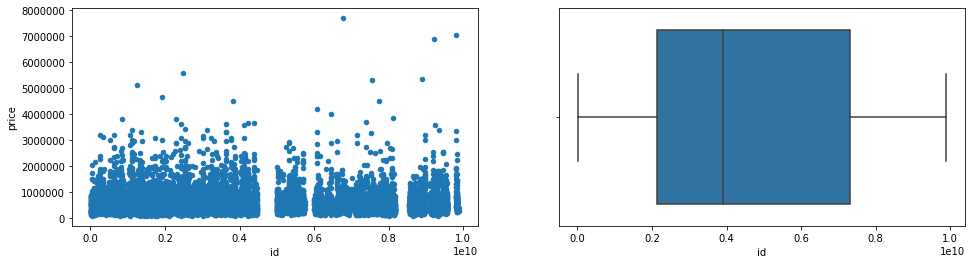

In [23]:
check_column(df,'id')

### date 

Drop Date

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [25]:
check_column_object(df,'date')

DataType:
	 datetime64[ns]
Null Values Present = 0
Stats = min   2014-05-02
max   2015-05-27
Name: date, dtype: datetime64[ns]

Value Counts:


2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-07-27    0.000046
2015-03-08    0.000046
2014-11-02    0.000046
2015-05-15    0.000046
2015-05-24    0.000046
Name: date, Length: 372, dtype: float64

### price

DataType:
	 float64
Null Values Present = 0


count      21597.000
mean      540296.574
std       367368.140
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64


Value Counts:


350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64

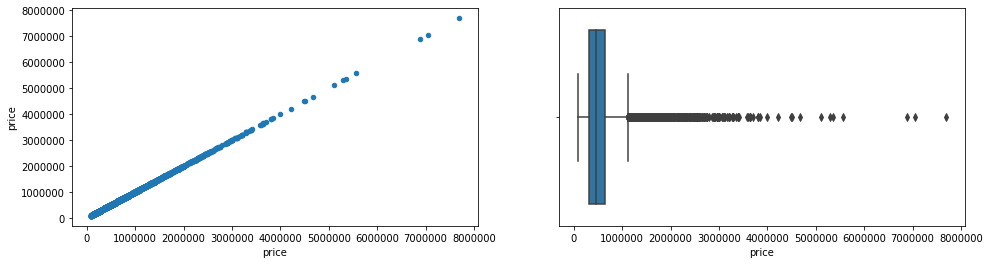

In [26]:
check_column(df,'price')

### bedrooms

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean         3.373
std          0.926
min          1.000
25%          3.000
50%          3.000
75%          4.000
max         33.000
Name: bedrooms, dtype: float64


Value Counts:


3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64

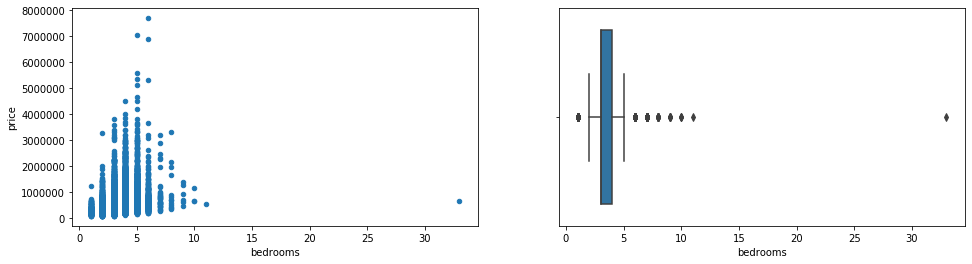

In [27]:
check_column(df,'bedrooms')


### bathrooms

DataType:
	 float64
Null Values Present = 0


count    21597.000
mean         2.116
std          0.769
min          0.500
25%          1.750
50%          2.250
75%          2.500
max          8.000
Name: bathrooms, dtype: float64


Value Counts:


2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.003287
4.75    0.001065
5.00    0.000972
5.25    0.000602
5.50    0.000463
1.25    0.000417
6.00    0.000278
5.75    0.000185
0.50    0.000185
8.00    0.000093
6.25    0.000093
6.75    0.000093
6.50    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64

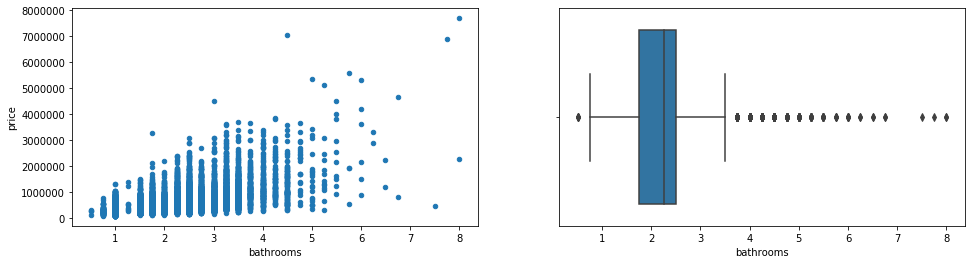

In [28]:
check_column(df,'bathrooms')

### sqft_living

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean      2080.322
std        918.106
min        370.000
25%       1430.000
50%       1910.000
75%       2550.000
max      13540.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
          ...   
4970    0.000046
2905    0.000046
2793    0.000046
4810    0.000046
1975    0.000046
Name: sqft_living, Length: 1034, dtype: float64

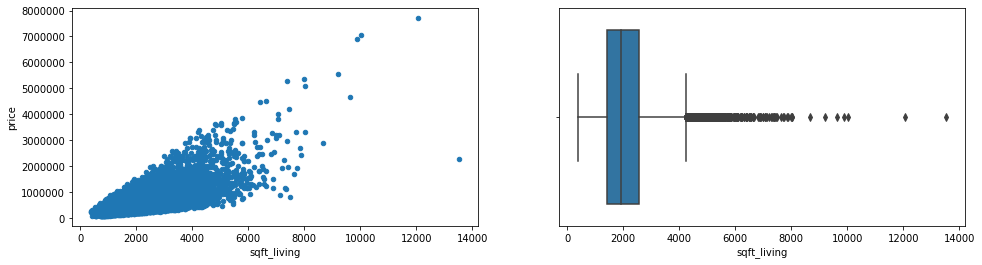

In [29]:
check_column(df,'sqft_living')

### sqft_lot

DataType:
	 int64
Null Values Present = 0


count      21597.000
mean       15099.409
std        41412.637
min          520.000
25%         5040.000
50%         7618.000
75%        10685.000
max      1651359.000
Name: sqft_lot, dtype: float64


Value Counts:


5000      0.016576
6000      0.013428
4000      0.011622
7200      0.010187
7500      0.005510
            ...   
1448      0.000046
38884     0.000046
17313     0.000046
35752     0.000046
315374    0.000046
Name: sqft_lot, Length: 9776, dtype: float64

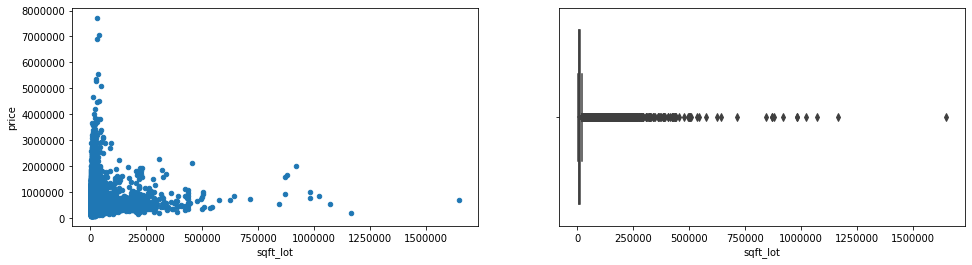

In [30]:
check_column(df,'sqft_lot')

### floors

DataType:
	 float64
Null Values Present = 0


count    21597.000
mean         1.494
std          0.540
min          1.000
25%          1.000
50%          1.500
75%          2.000
max          3.500
Name: floors, dtype: float64


Value Counts:


1.0    0.494189
2.0    0.381303
1.5    0.088438
3.0    0.028291
2.5    0.007455
3.5    0.000324
Name: floors, dtype: float64

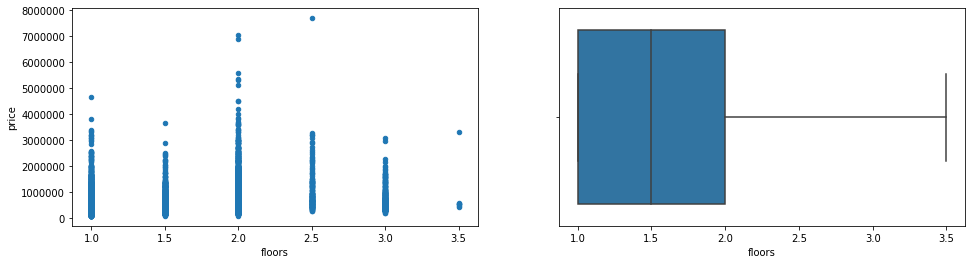

In [31]:
check_column(df,'floors')

### waterfront

DataType:
	 float64
Null Values Present = 2376


count    19221.000
mean         0.008
std          0.087
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: waterfront, dtype: float64


Value Counts:


0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

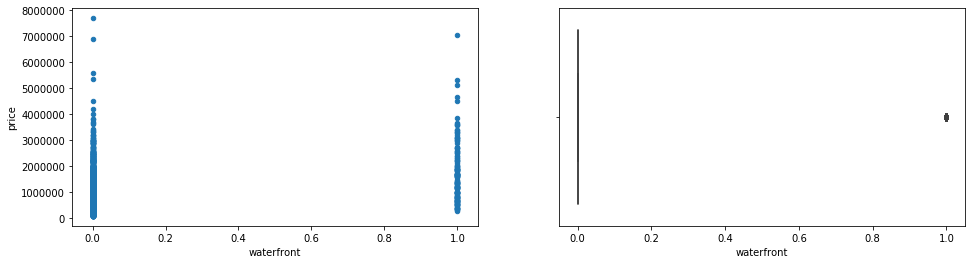

In [32]:
check_column(df,'waterfront')

In [33]:
df['waterfront'].fillna(0.0, inplace=True)

df['waterfront'].isna().sum()

0

In [34]:
df['wf'] = df['waterfront'].copy()

df['wf'].value_counts()

0.0    21451
1.0      146
Name: wf, dtype: int64

### view

DataType:
	 float64
Null Values Present = 63


count    21534.000
mean         0.234
std          0.766
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          4.000
Name: view, dtype: float64


Value Counts:


0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

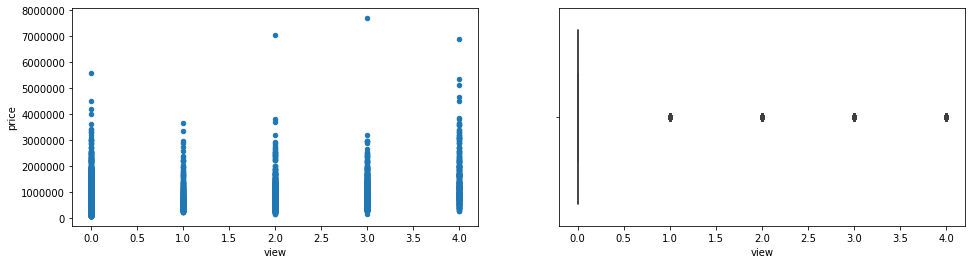

In [35]:
check_column(df,'view')

In [36]:
df['view'].fillna(0, inplace=True)

df['view'].isna().sum()

0

In [37]:
df['viewed'] = df['view'].astype('bool')

df['viewed'].value_counts()

False    19485
True      2112
Name: viewed, dtype: int64

### condition

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean         3.410
std          0.651
min          1.000
25%          3.000
50%          3.000
75%          4.000
max          5.000
Name: condition, dtype: float64


Value Counts:


3    0.649164
4    0.262861
5    0.078761
2    0.007871
1    0.001343
Name: condition, dtype: float64

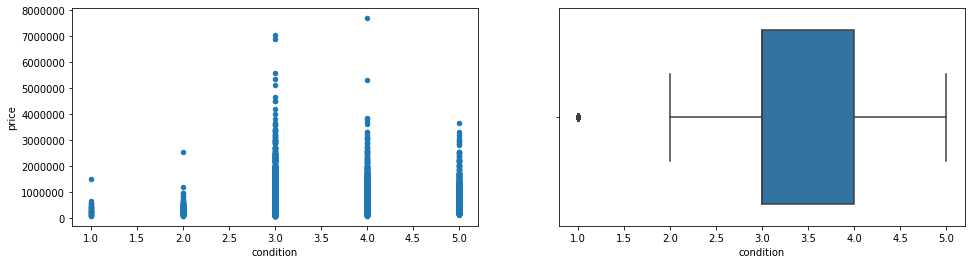

In [38]:
check_column(df,'condition')

### grade

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean         7.658
std          1.173
min          3.000
25%          7.000
50%          7.000
75%          8.000
max         13.000
Name: grade, dtype: float64


Value Counts:


7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

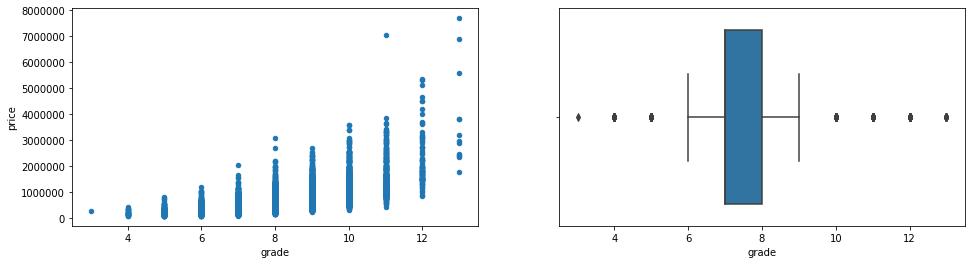

In [39]:
check_column(df,'grade')

### sqft_above

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean      1788.597
std        827.760
min        370.000
25%       1190.000
50%       1560.000
75%       2210.000
max       9410.000
Name: sqft_above, dtype: float64


Value Counts:


1300    0.009816
1010    0.009724
1200    0.009538
1220    0.008890
1140    0.008520
          ...   
2601    0.000046
440     0.000046
2473    0.000046
2441    0.000046
1975    0.000046
Name: sqft_above, Length: 942, dtype: float64

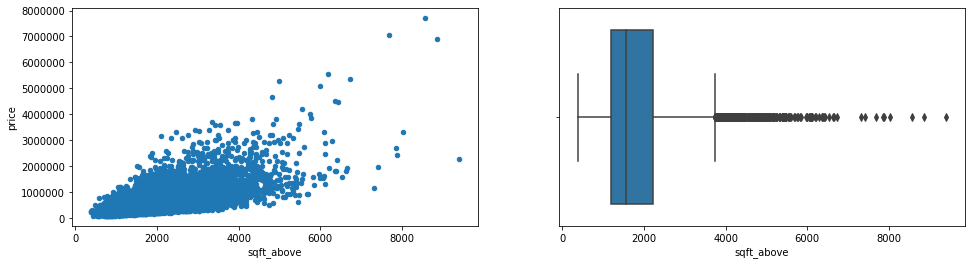

In [40]:
check_column(df,'sqft_above')

### sqft_basement

In [41]:
df['sqft_basement'].replace(to_replace='?', value='0.0', inplace=True)

In [42]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

DataType:
	 float64
Null Values Present = 0


count    21597.000
mean       285.717
std        439.820
min          0.000
25%          0.000
50%          0.000
75%        550.000
max       4820.000
Name: sqft_basement, dtype: float64


Value Counts:


0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

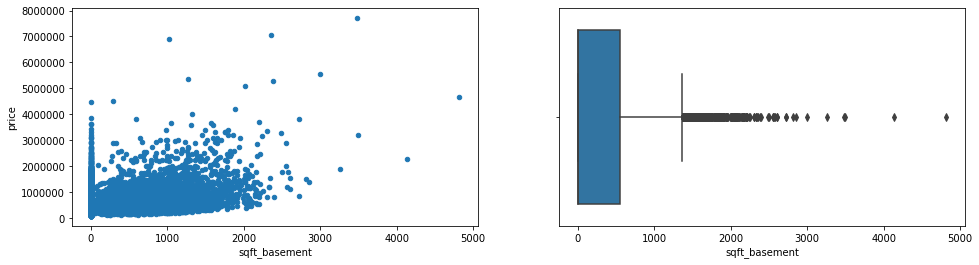

In [43]:
check_column(df,'sqft_basement')

### yr_built

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean      1971.000
std         29.375
min       1900.000
25%       1951.000
50%       1975.000
75%       1997.000
max       2015.000
Name: yr_built, dtype: float64


Value Counts:


2014    0.025883
2006    0.020975
2005    0.020836
2004    0.020049
2003    0.019447
          ...   
1933    0.001389
1901    0.001343
1902    0.001250
1935    0.001111
1934    0.000972
Name: yr_built, Length: 116, dtype: float64

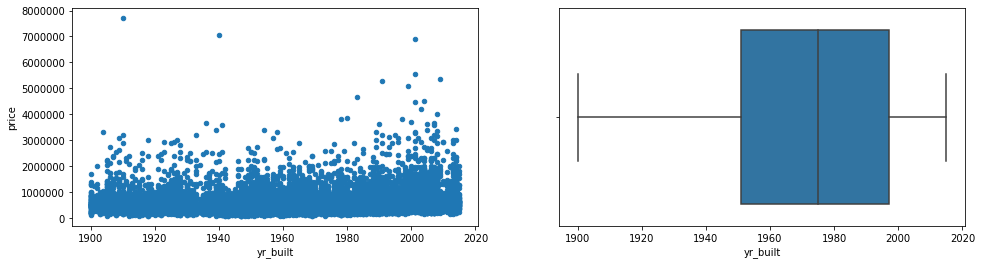

In [44]:
check_column(df,'yr_built')

In [45]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['yr_built'].quantile(quantile_list)

quantiles 

0.00    1900.0
0.25    1951.0
0.50    1975.0
0.75    1997.0
1.00    2015.0
Name: yr_built, dtype: float64

In [46]:
yr_built_bins = [1899, 1951, 1975, 1997, 2015]
yb_labels = [1, 2, 3, 4]

df['yr_range'] = pd.cut(df['yr_built'], bins=yr_built_bins)

df['yr_category'] = pd.cut(df['yr_built'], bins=yr_built_bins, labels=yb_labels) 

In [47]:
df[['yr_built','yr_range', 'yr_category']].iloc[800:810] 

,yr_built,yr_range,yr_category
800,1913,"(1899, 1951]",1
801,1967,"(1951, 1975]",2
802,1987,"(1975, 1997]",3
803,2007,"(1997, 2015]",4
804,1954,"(1951, 1975]",2
805,1989,"(1975, 1997]",3
806,1989,"(1975, 1997]",3
807,1977,"(1975, 1997]",3
808,2004,"(1997, 2015]",4
809,1999,"(1997, 2015]",4


### yr_renovated

DataType:
	 float64
Null Values Present = 3842


count    17755.000
mean        83.637
std        399.946
min          0.000
25%          0.000
50%          0.000
75%          0.000
max       2015.000
Name: yr_renovated, dtype: float64


Value Counts:


0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

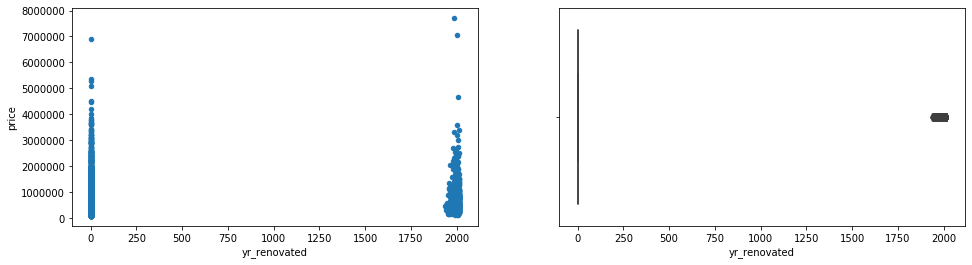

In [48]:
check_column(df,'yr_renovated')

In [49]:
df['yr_renovated'].fillna(0.0, inplace=True)

df['yr_renovated'].isna().sum()

0

In [50]:
df['is_renovated'] = np.where (df['yr_renovated'] == 0.0, 0, 1)

df['is_renovated'].value_counts()

0    20853
1      744
Name: is_renovated, dtype: int64

### zipcode

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean     98077.952
std         53.513
min      98001.000
25%      98033.000
50%      98065.000
75%      98118.000
max      98199.000
Name: zipcode, dtype: float64


Value Counts:


98103    0.027874
98038    0.027272
98115    0.026994
98052    0.026578
98117    0.025605
           ...   
98102    0.004815
98010    0.004630
98024    0.003704
98148    0.002639
98039    0.002315
Name: zipcode, Length: 70, dtype: float64

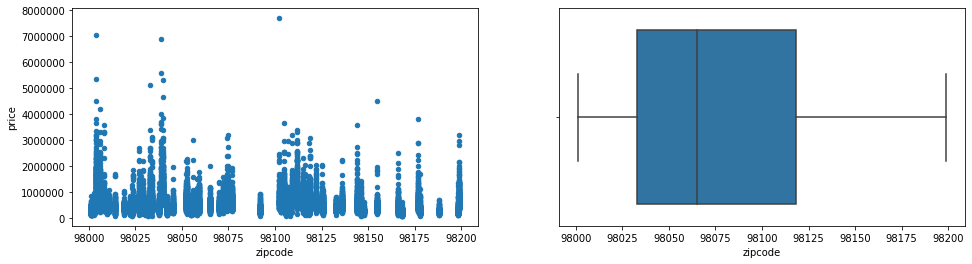

In [51]:
check_column(df,'zipcode')

### lat	long

Eliminated due to correlation with zipcodes.

### sqft_living15

DataType:
	 int64
Null Values Present = 0


count    21597.00
mean      1986.62
std        685.23
min        399.00
25%       1490.00
50%       1840.00
75%       2360.00
max       6210.00
Name: sqft_living15, dtype: float64


Value Counts:


1540    0.009122
1440    0.009029
1560    0.008890
1500    0.008334
1460    0.007825
          ...   
4890    0.000046
2873    0.000046
952     0.000046
3193    0.000046
2049    0.000046
Name: sqft_living15, Length: 777, dtype: float64

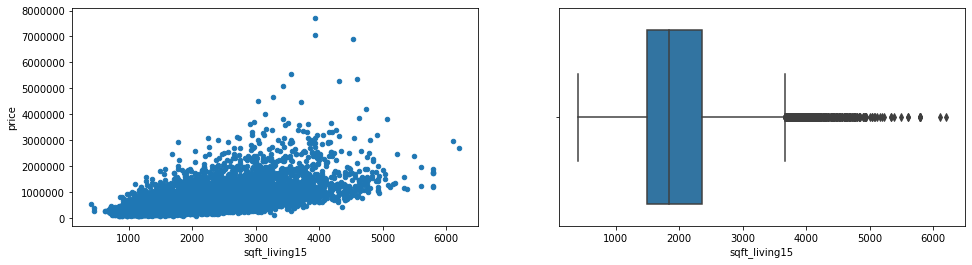

In [52]:
check_column(df,'sqft_living15')

### sqft_lot15

DataType:
	 int64
Null Values Present = 0


count     21597.000
mean      12758.284
std       27274.442
min         651.000
25%        5100.000
50%        7620.000
75%       10083.000
max      871200.000
Name: sqft_lot15, dtype: float64


Value Counts:


5000      0.019771
4000      0.016484
6000      0.013335
7200      0.009724
4800      0.006714
            ...   
11036     0.000046
8989      0.000046
871200    0.000046
809       0.000046
6147      0.000046
Name: sqft_lot15, Length: 8682, dtype: float64

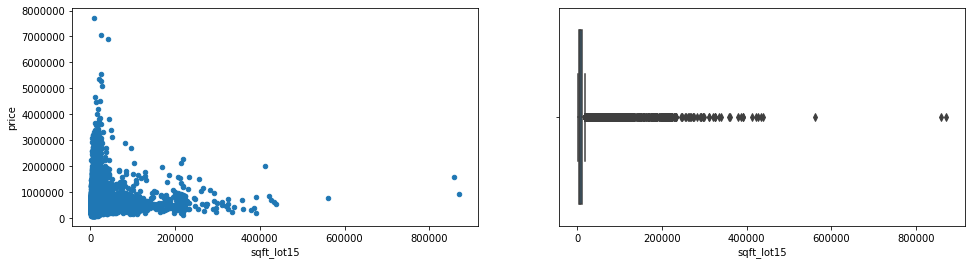

In [53]:
check_column(df,'sqft_lot15')

# EXPLORE

## Correlation

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a21b30780>)

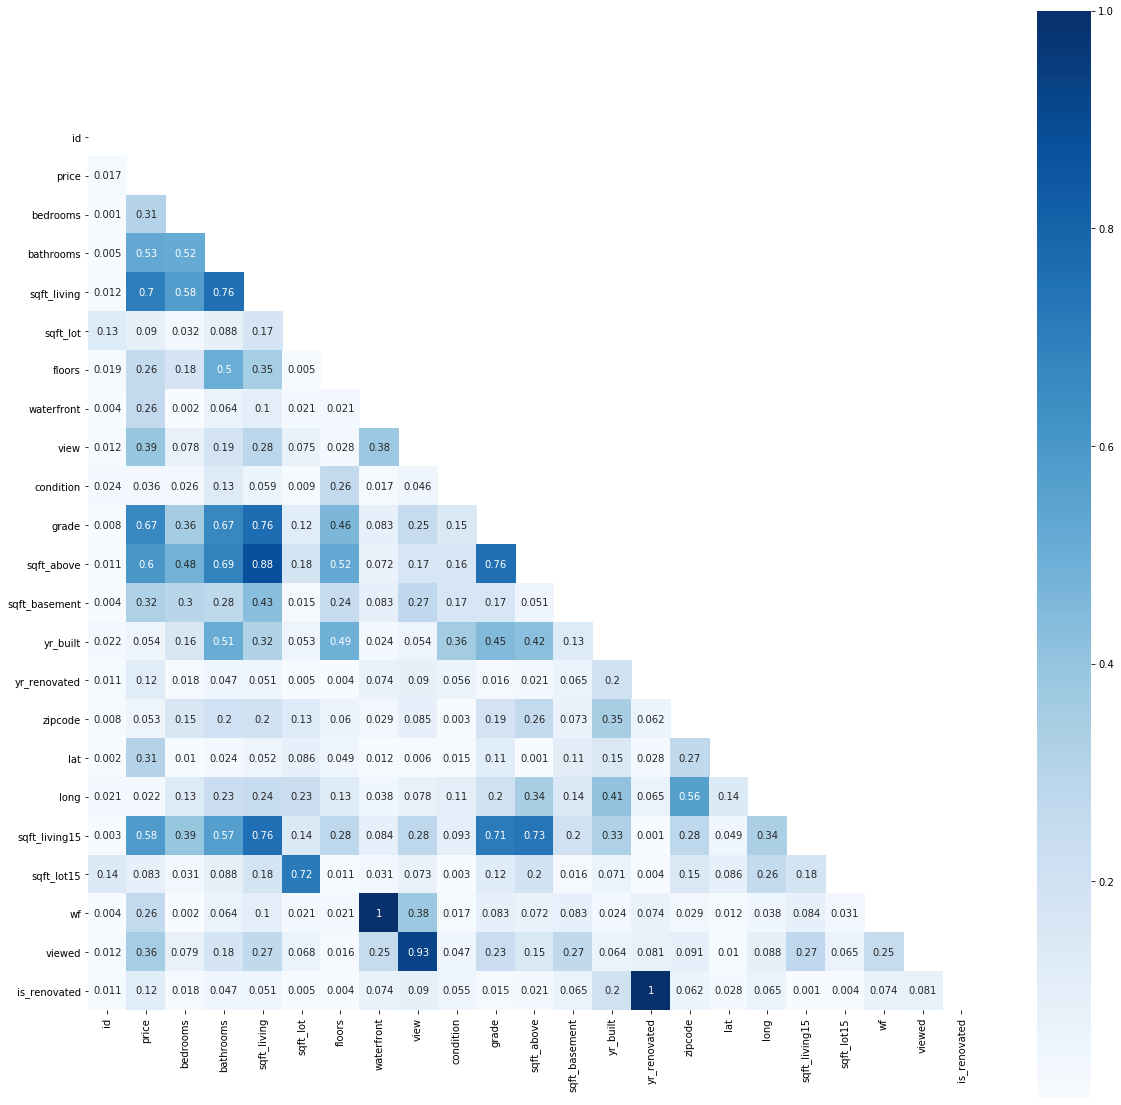

In [54]:
corr = df.corr()

def corrplot(corr,figsize=(20,20)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,cmap="Blues",annot=True,ax=ax)
    ax.set_ylim(len(corr), -.5, .5)
    return fig, ax

corrplot(np.abs(corr.round(3)))

Drop "sqft_above" due to correlation with "sqft_living" and "grade". Drop "id" and "date" due to no significant statistical meaning. Drop "lat" and "long" due to correlation with "zipcode".

In [55]:
drop_cols1 = ['sqft_above','id','lat', 'long', 'date']
df.drop(drop_cols1,axis=1,inplace=True)

In [56]:
#df_post_corr.columns

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'wf',
       'viewed', 'yr_range', 'yr_category', 'is_renovated'],
      dtype='object')

In [57]:
def histograms(df):
    plt.style.use('ggplot')
    for column in df.describe():
        fig = plt.figure(figsize=(12, 5))
        
        ax = fig.add_subplot(121)
        ax.hist(df[column], density=True, label = column+' histogram', bins=20)
        ax.set_title(column.capitalize())

        ax.legend()
        
        fig.tight_layout()
        

In [58]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,285.716581,1970.999676,68.758207,98077.951845,1986.620318,12758.283512,0.006760,0.034449
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,439.819830,29.375234,364.037499,53.513072,685.230472,27274.441950,0.081944,0.182384
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,550.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,1.000000,1.000000


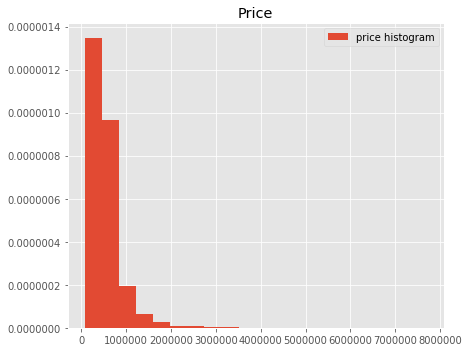

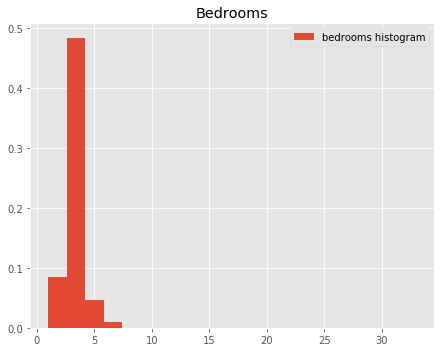

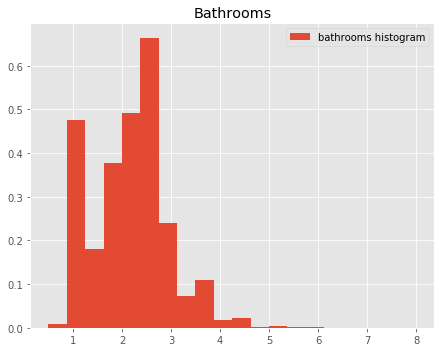

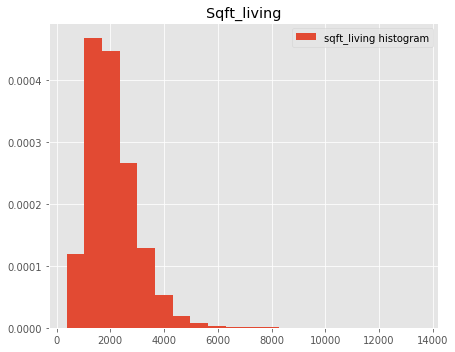

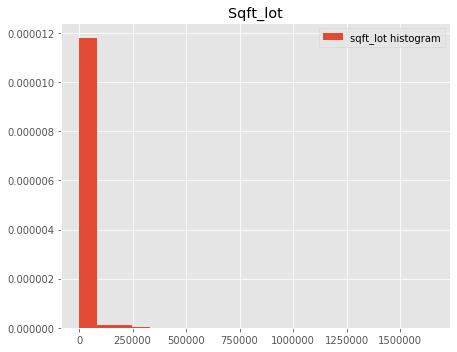

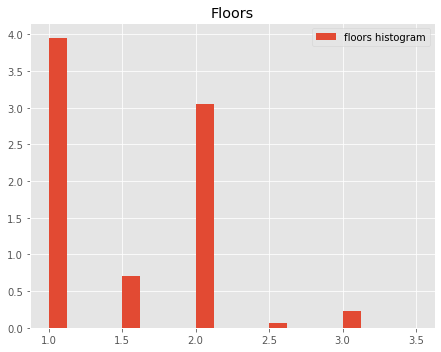

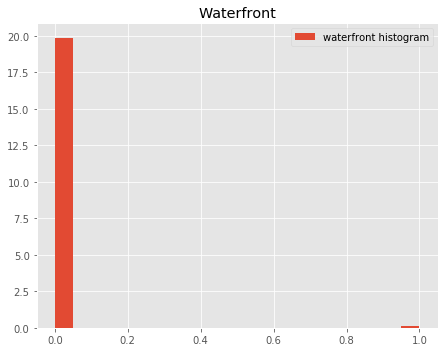

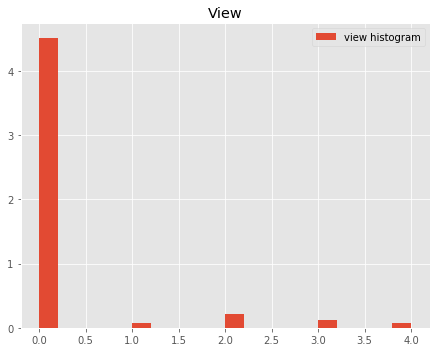

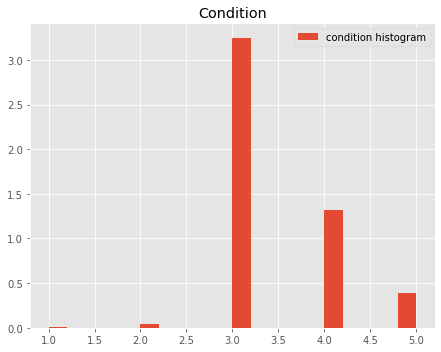

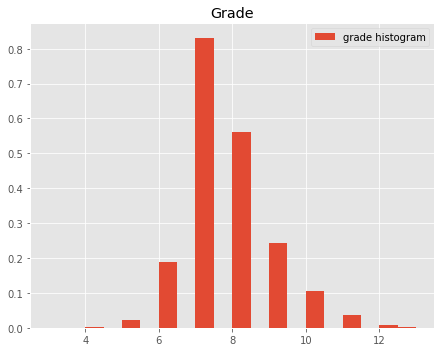

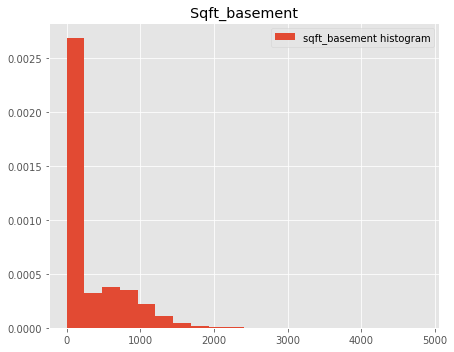

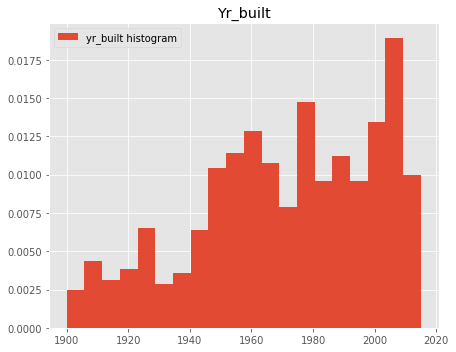

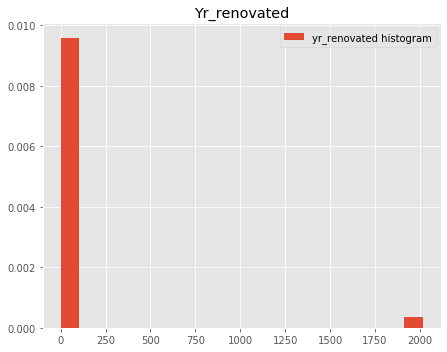

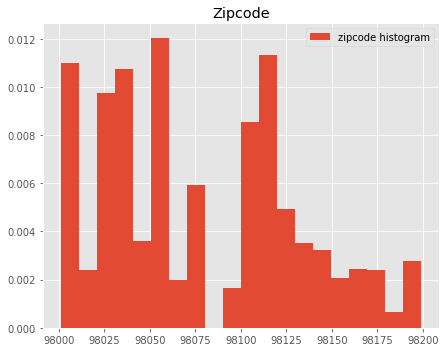

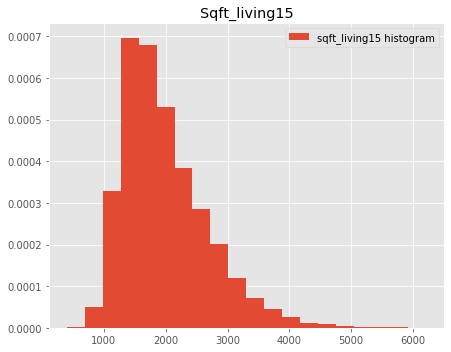

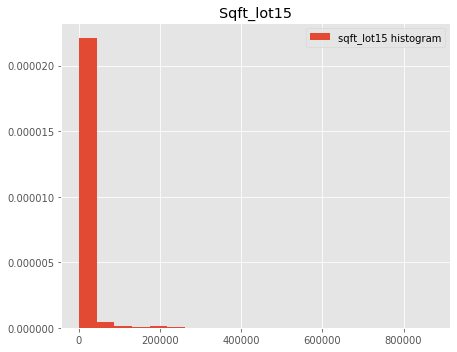

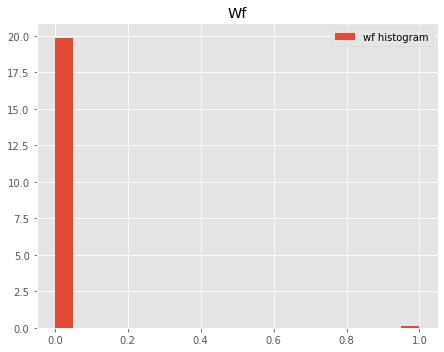

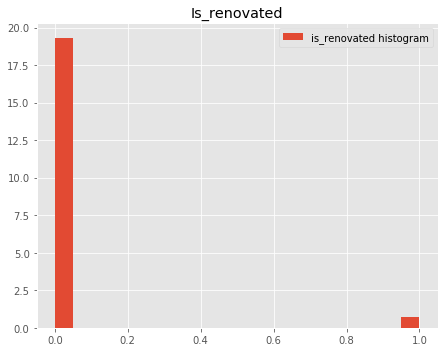

In [59]:
histograms(df)

In [60]:
log_cols = ['sqft_living', 'sqft_living15']


for col in log_cols:
    df[col+'_log'] = np.log(df[col])

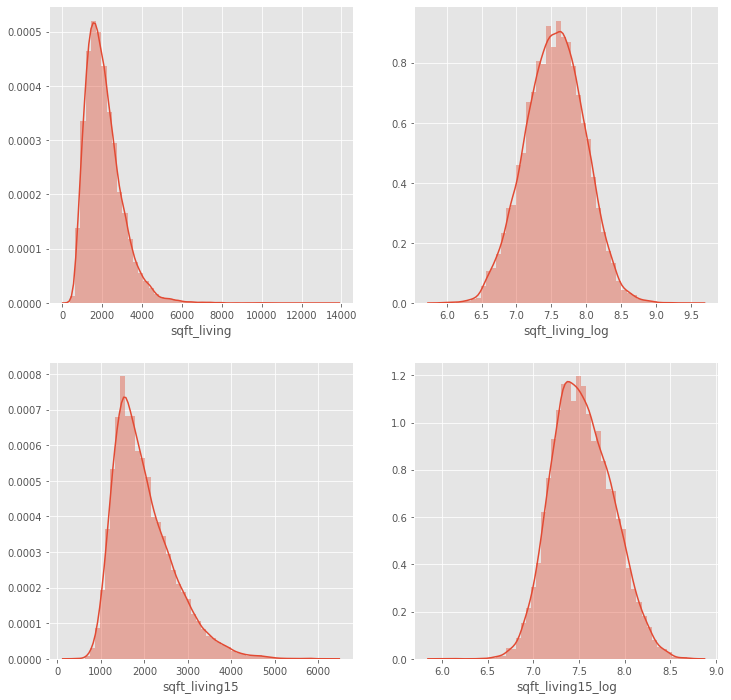

In [61]:
plt.style.use('ggplot')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
sns.distplot(df['sqft_living'], ax=ax[0][0])
sns.distplot(df['sqft_living_log'], ax=ax[0][1])
sns.distplot(df['sqft_living15'], ax=ax[1][0])
sns.distplot(df['sqft_living15_log'], ax=ax[1][1])

In [62]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,viewed,yr_range,yr_category,is_renovated,sqft_living_log,sqft_living15_log
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,1340,5650,0.0,False,"(1951, 1975]",2,0,7.073270,7.200425
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,1690,7639,0.0,False,"(1899, 1951]",1,1,7.851661,7.432484
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,2720,8062,0.0,False,"(1899, 1951]",1,0,6.646391,7.908387
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,1360,5000,0.0,False,"(1951, 1975]",2,0,7.580700,7.215240
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,1800,7503,0.0,False,"(1975, 1997]",3,0,7.426549,7.495542


## Scaling

Scale everything except the target and boolean variables.

In [63]:
import warnings
warnings.filterwarnings('ignore')

scale_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
              'grade', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sqft_living_log',
              'sqft_living15_log']

scaler = StandardScaler()


for col in scale_cols:
    col_data = df[col].values
    stdscale = scaler.fit_transform(col_data.reshape(-1, 1))
    df['sca_'+col] = stdscale.flatten()
    
df.describe().round(3)    



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.00,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,285.717,1971.000,68.758,98077.952,1986.62,12758.284,0.007,0.034,7.551,7.539,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000
std,367368.140,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,439.820,29.375,364.037,53.513,685.23,27274.442,0.082,0.182,0.424,0.327,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,0.000,1900.000,0.000,98001.000,399.00,651.000,0.000,0.000,5.914,5.989,-2.562,-2.101,-1.863,-0.352,-0.916,-0.305,-3.704,-3.970,-0.650,-2.317,-0.444,-3.860,-4.735
25%,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,0.000,1951.000,0.000,98033.000,1490.00,5100.000,0.000,0.000,7.265,7.307,-0.403,-0.476,-0.708,-0.243,-0.916,-0.305,-0.630,-0.561,-0.650,-0.725,-0.281,-0.673,-0.711
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,0.000,1975.000,0.000,98065.000,1840.00,7620.000,0.000,0.000,7.555,7.518,-0.403,0.174,-0.186,-0.181,0.011,-0.305,-0.630,-0.561,-0.650,-0.214,-0.188,0.010,-0.067
75%,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,550.000,1997.000,0.000,98118.000,2360.00,10083.000,0.000,0.000,7.844,7.766,0.677,0.500,0.512,-0.107,0.937,-0.305,0.907,0.292,0.601,0.545,-0.098,0.691,0.693
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,4820.000,2015.000,2015.000,98199.000,6210.00,871200.000,1.000,1.000,9.513,8.734,31.985,7.652,12.482,39.512,3.717,4.926,2.444,4.554,10.310,6.164,31.475,4.627,3.648


In [64]:
df.shape

(21597, 36)

## Drop Outliers

In [65]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

idx = find_outliers(df['price'])
idx



0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [66]:
display(df.loc[idx==True].describe().round(3))
display(df.loc[idx==False].describe().round(3))
df = df.loc[idx==False]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.00,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000,406.000
mean,2277660.099,4.266,3.594,4577.089,29331.751,1.872,0.163,1.717,3.502,10.404,842.675,1974.818,250.970,98060.32,3355.771,19364.182,0.163,0.126,8.390,8.088,0.964,1.922,2.720,0.344,0.700,1.940,0.142,2.341,1.266,1.998,0.242,1.978,1.676
std,768348.039,0.944,0.978,1395.282,76438.853,0.474,0.369,1.675,0.726,1.163,809.210,33.560,662.969,56.07,815.443,30513.711,0.369,0.332,0.272,0.250,1.020,1.272,1.520,1.846,0.878,2.191,1.116,0.991,1.840,1.190,1.119,0.641,0.763
min,1650000.000,2.000,1.750,2360.000,1880.000,1.000,0.000,0.000,2.000,7.000,0.000,1900.000,0.000,98004.00,1490.000,2199.000,0.000,0.000,7.766,7.307,-1.482,-0.476,0.305,-0.319,-0.916,-0.305,-2.167,-0.561,-0.650,-0.725,-0.387,0.509,-0.711
25%,1792500.000,4.000,3.000,3715.000,8864.500,2.000,0.000,0.000,3.000,10.000,0.000,1950.000,0.000,98006.00,2870.000,8557.250,0.000,0.000,8.220,7.962,0.677,1.150,1.781,-0.151,0.937,-0.305,-0.630,1.996,-0.650,1.289,-0.154,1.578,1.290
50%,2000000.000,4.000,3.500,4325.000,14754.000,2.000,0.000,2.000,3.000,10.000,835.000,1988.000,0.000,98040.00,3290.000,13224.500,0.000,0.000,8.372,8.099,0.677,1.800,2.445,-0.008,0.937,2.311,-0.630,1.996,1.249,1.902,0.017,1.937,1.708
75%,2497500.000,5.000,4.250,5150.000,21241.000,2.000,0.000,3.000,4.000,11.000,1377.500,2004.000,0.000,98112.00,3847.500,19273.250,0.000,0.000,8.547,8.255,1.756,2.775,3.344,0.148,0.937,3.618,0.907,2.849,2.482,2.716,0.239,2.348,2.186
max,7700000.000,8.000,8.000,13540.000,920423.000,3.500,1.000,4.000,5.000,13.000,4820.000,2015.000,2014.000,98199.00,6210.000,411962.000,1.000,1.000,9.513,8.734,4.995,7.652,12.482,21.862,3.717,4.926,2.444,4.554,10.310,6.164,14.637,4.627,3.648


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000
mean,507010.292,3.356,2.088,2032.486,14826.730,1.487,0.004,0.205,3.408,7.605,275.046,1970.927,65.267,98078.290,1960.389,12631.721,0.004,0.033,7.535,7.529,-0.018,-0.037,-0.052,-0.007,-0.013,-0.037,-0.003,-0.045,-0.024,-0.038,-0.005,-0.038,-0.032
std,259462.210,0.918,0.736,836.739,40400.947,0.538,0.061,0.707,0.649,1.109,422.581,29.285,354.984,53.407,655.151,27193.757,0.061,0.178,0.410,0.320,0.991,0.957,0.911,0.976,0.997,0.924,0.997,0.945,0.961,0.956,0.997,0.967,0.976
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,0.000,1900.000,0.000,98001.000,399.000,651.000,0.000,0.000,5.914,5.989,-2.562,-2.101,-1.863,-0.352,-0.916,-0.305,-3.704,-3.970,-0.650,-2.317,-0.444,-3.860,-4.735
25%,320000.000,3.000,1.500,1410.000,5005.500,1.000,0.000,0.000,3.000,7.000,0.000,1951.000,0.000,98033.000,1480.000,5080.000,0.000,0.000,7.251,7.300,-0.403,-0.801,-0.730,-0.244,-0.916,-0.305,-0.630,-0.561,-0.650,-0.739,-0.282,-0.706,-0.732
50%,447000.000,3.000,2.250,1890.000,7560.000,1.000,0.000,0.000,3.000,7.000,0.000,1975.000,0.000,98065.000,1820.000,7576.000,0.000,0.000,7.544,7.507,-0.403,0.174,-0.207,-0.182,-0.916,-0.305,-0.630,-0.561,-0.650,-0.243,-0.190,-0.015,-0.100
75%,627650.000,4.000,2.500,2500.000,10490.500,2.000,0.000,0.000,4.000,8.000,530.000,1996.000,0.000,98118.000,2330.000,10000.000,0.000,0.000,7.824,7.754,0.677,0.500,0.457,-0.111,0.937,-0.305,0.907,0.292,0.555,0.501,-0.101,0.644,0.654
max,1640000.000,33.000,7.500,7480.000,1651359.000,3.500,1.000,4.000,5.000,12.000,2850.000,2015.000,2015.000,98199.000,5790.000,871200.000,1.000,1.000,8.920,8.664,31.985,7.002,5.881,39.512,3.717,4.926,2.444,3.701,5.830,5.551,31.475,3.228,3.434


In [67]:
df_outliers = pd.DataFrame()
for col in df.describe().columns:
    df_outliers[col] = find_outliers(df[col])
df_outliers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
test_outs = df_outliers.apply(lambda x: np.any(x),axis=1)

In [69]:
print(len(test_outs), df_outliers.shape)
test_outs
np.shape(test_outs)

21191 (21191, 33)


(21191,)

In [70]:
df.shape

(21191, 36)

In [71]:
np.sum(test_outs)

2536

In [72]:
df.loc[test_outs==False].describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.0,18655.000,18655.000,18655.000,18655.000,18655.000,18655.0,18655.000,18655.000,18655.000,18655.0,18655.0,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000
mean,467430.582,3.311,2.023,1922.376,9825.017,1.475,0.0,0.088,3.419,7.493,243.632,1971.575,0.0,98078.347,1889.875,9101.479,0.0,0.0,7.492,7.499,-0.067,-0.121,-0.172,-0.127,-0.035,-0.190,0.014,-0.141,-0.096,-0.141,-0.134,-0.139,-0.123
std,207577.583,0.841,0.677,710.718,11390.237,0.539,0.0,0.394,0.646,0.973,376.714,28.968,0.0,53.233,578.449,9114.839,0.0,0.0,0.379,0.299,0.908,0.881,0.774,0.275,0.999,0.515,0.993,0.829,0.857,0.844,0.334,0.894,0.912
min,82000.000,1.000,0.500,550.000,520.000,1.000,0.0,0.000,2.000,5.000,0.000,1900.000,0.0,98001.000,720.000,651.000,0.0,0.0,6.310,6.579,-2.562,-2.101,-1.667,-0.352,-0.916,-0.305,-2.167,-2.266,-0.650,-1.849,-0.444,-2.925,-2.932
25%,310000.000,3.000,1.500,1380.000,5000.000,1.000,0.0,0.000,3.000,7.000,0.000,1953.000,0.0,98033.000,1460.000,5000.000,0.0,0.0,7.230,7.286,-0.403,-0.801,-0.763,-0.244,-0.916,-0.305,-0.630,-0.561,-0.650,-0.769,-0.284,-0.756,-0.774
50%,427005.000,3.000,2.000,1820.000,7350.000,1.000,0.0,0.000,3.000,7.000,0.000,1975.000,0.0,98065.000,1780.000,7440.000,0.0,0.0,7.507,7.484,-0.403,-0.151,-0.284,-0.187,-0.916,-0.305,-0.630,-0.561,-0.650,-0.302,-0.195,-0.104,-0.168
75%,585000.000,4.000,2.500,2370.000,9879.000,2.000,0.0,0.000,4.000,8.000,480.000,1997.000,0.0,98118.000,2240.000,9600.000,0.0,0.0,7.771,7.714,0.677,0.500,0.316,-0.126,0.937,-0.305,0.907,0.292,0.442,0.370,-0.116,0.518,0.534
max,1280000.000,6.000,4.250,4530.000,134489.000,3.000,0.0,2.000,5.000,10.000,1540.000,2015.000,0.0,98199.000,3920.000,93825.000,0.0,0.0,8.418,8.274,2.836,2.775,2.668,2.883,2.790,2.311,2.444,1.996,2.852,2.822,2.972,2.046,2.243


In [73]:
df_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191,21191
unique,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,20774,21139,21081,20997,20852,21185,21111,20522,21162,20848,20965,21191,20498,21191,20976,20837,21111,20498,21155,21160,21139,21081,20997,20852,21185,20522,21162,20848,20965,20976,20837,21155,21160


In [74]:
df_clean = df.loc[test_outs==False]
df_clean.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.0,18655.000,18655.000,18655.000,18655.000,18655.000,18655.0,18655.000,18655.000,18655.000,18655.0,18655.0,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000
mean,467430.582,3.311,2.023,1922.376,9825.017,1.475,0.0,0.088,3.419,7.493,243.632,1971.575,0.0,98078.347,1889.875,9101.479,0.0,0.0,7.492,7.499,-0.067,-0.121,-0.172,-0.127,-0.035,-0.190,0.014,-0.141,-0.096,-0.141,-0.134,-0.139,-0.123
std,207577.583,0.841,0.677,710.718,11390.237,0.539,0.0,0.394,0.646,0.973,376.714,28.968,0.0,53.233,578.449,9114.839,0.0,0.0,0.379,0.299,0.908,0.881,0.774,0.275,0.999,0.515,0.993,0.829,0.857,0.844,0.334,0.894,0.912
min,82000.000,1.000,0.500,550.000,520.000,1.000,0.0,0.000,2.000,5.000,0.000,1900.000,0.0,98001.000,720.000,651.000,0.0,0.0,6.310,6.579,-2.562,-2.101,-1.667,-0.352,-0.916,-0.305,-2.167,-2.266,-0.650,-1.849,-0.444,-2.925,-2.932
25%,310000.000,3.000,1.500,1380.000,5000.000,1.000,0.0,0.000,3.000,7.000,0.000,1953.000,0.0,98033.000,1460.000,5000.000,0.0,0.0,7.230,7.286,-0.403,-0.801,-0.763,-0.244,-0.916,-0.305,-0.630,-0.561,-0.650,-0.769,-0.284,-0.756,-0.774
50%,427005.000,3.000,2.000,1820.000,7350.000,1.000,0.0,0.000,3.000,7.000,0.000,1975.000,0.0,98065.000,1780.000,7440.000,0.0,0.0,7.507,7.484,-0.403,-0.151,-0.284,-0.187,-0.916,-0.305,-0.630,-0.561,-0.650,-0.302,-0.195,-0.104,-0.168
75%,585000.000,4.000,2.500,2370.000,9879.000,2.000,0.0,0.000,4.000,8.000,480.000,1997.000,0.0,98118.000,2240.000,9600.000,0.0,0.0,7.771,7.714,0.677,0.500,0.316,-0.126,0.937,-0.305,0.907,0.292,0.442,0.370,-0.116,0.518,0.534
max,1280000.000,6.000,4.250,4530.000,134489.000,3.000,0.0,2.000,5.000,10.000,1540.000,2015.000,0.0,98199.000,3920.000,93825.000,0.0,0.0,8.418,8.274,2.836,2.775,2.668,2.883,2.790,2.311,2.444,1.996,2.852,2.822,2.972,2.046,2.243


In [75]:
df.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000,21191.000
mean,507010.292,3.356,2.088,2032.486,14826.730,1.487,0.004,0.205,3.408,7.605,275.046,1970.927,65.267,98078.290,1960.389,12631.721,0.004,0.033,7.535,7.529,-0.018,-0.037,-0.052,-0.007,-0.013,-0.037,-0.003,-0.045,-0.024,-0.038,-0.005,-0.038,-0.032
std,259462.210,0.918,0.736,836.739,40400.947,0.538,0.061,0.707,0.649,1.109,422.581,29.285,354.984,53.407,655.151,27193.757,0.061,0.178,0.410,0.320,0.991,0.957,0.911,0.976,0.997,0.924,0.997,0.945,0.961,0.956,0.997,0.967,0.976
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,0.000,1900.000,0.000,98001.000,399.000,651.000,0.000,0.000,5.914,5.989,-2.562,-2.101,-1.863,-0.352,-0.916,-0.305,-3.704,-3.970,-0.650,-2.317,-0.444,-3.860,-4.735
25%,320000.000,3.000,1.500,1410.000,5005.500,1.000,0.000,0.000,3.000,7.000,0.000,1951.000,0.000,98033.000,1480.000,5080.000,0.000,0.000,7.251,7.300,-0.403,-0.801,-0.730,-0.244,-0.916,-0.305,-0.630,-0.561,-0.650,-0.739,-0.282,-0.706,-0.732
50%,447000.000,3.000,2.250,1890.000,7560.000,1.000,0.000,0.000,3.000,7.000,0.000,1975.000,0.000,98065.000,1820.000,7576.000,0.000,0.000,7.544,7.507,-0.403,0.174,-0.207,-0.182,-0.916,-0.305,-0.630,-0.561,-0.650,-0.243,-0.190,-0.015,-0.100
75%,627650.000,4.000,2.500,2500.000,10490.500,2.000,0.000,0.000,4.000,8.000,530.000,1996.000,0.000,98118.000,2330.000,10000.000,0.000,0.000,7.824,7.754,0.677,0.500,0.457,-0.111,0.937,-0.305,0.907,0.292,0.555,0.501,-0.101,0.644,0.654
max,1640000.000,33.000,7.500,7480.000,1651359.000,3.500,1.000,4.000,5.000,12.000,2850.000,2015.000,2015.000,98199.000,5790.000,871200.000,1.000,1.000,8.920,8.664,31.985,7.002,5.881,39.512,3.717,4.926,2.444,3.701,5.830,5.551,31.475,3.228,3.434


In [76]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,wf,is_renovated,sqft_living_log,sqft_living15_log,sca_bedrooms,sca_bathrooms,sca_sqft_living,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_living15,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,1.865500e+04,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.0,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.0,18655.000000,18655.000000,18655.000000,18655.0,18655.0,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000,18655.000000
mean,4.674306e+05,3.310855,2.022661,1922.376253,9825.017261,1.475449,0.0,0.088073,3.419137,7.492951,243.632485,1971.574752,0.0,98078.346717,1889.875422,9101.479282,0.0,0.0,7.491752,7.499351,-0.067307,-0.121156,-0.172038,-0.127365,-0.034553,-0.189769,0.014314,-0.140614,-0.095687,-0.141189,-0.134077,-0.139016,-0.122589
std,2.075776e+05,0.841215,0.677349,710.717642,11390.236520,0.538919,0.0,0.393627,0.645882,0.972850,376.714254,28.967732,0.0,53.233162,578.449276,9114.839090,0.0,0.0,0.379132,0.298795,0.908167,0.880856,0.774131,0.275049,0.998608,0.514778,0.992854,0.829247,0.856539,0.844187,0.334197,0.893798,0.912463
min,8.200000e+04,1.000000,0.500000,550.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,0.000000,1900.000000,0.0,98001.000000,720.000000,651.000000,0.0,0.0,6.309918,6.579251,-2.562083,-2.101296,-1.666863,-0.352060,-0.915552,-0.304949,-2.167193,-2.265579,-0.649637,-1.848502,-0.443916,-2.925170,-2.932400
25%,3.100000e+05,3.000000,1.500000,1380.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,0.000000,1953.000000,0.0,98033.000000,1460.000000,5000.000000,0.0,0.0,7.229839,7.286192,-0.402903,-0.800849,-0.762807,-0.243878,-0.915552,-0.304949,-0.629986,-0.560800,-0.649637,-0.768548,-0.284459,-0.756473,-0.773537
50%,4.270050e+05,3.000000,2.000000,1820.000000,7350.000000,1.000000,0.0,0.000000,3.000000,7.000000,0.000000,1975.000000,0.0,98065.000000,1780.000000,7440.000000,0.0,0.0,7.506592,7.484369,-0.402903,-0.150626,-0.283549,-0.187131,-0.915552,-0.304949,-0.629986,-0.560800,-0.649637,-0.301541,-0.194996,-0.104033,-0.168342
75%,5.850000e+05,4.000000,2.500000,2370.000000,9879.000000,2.000000,0.0,0.000000,4.000000,8.000000,480.000000,1997.000000,0.0,98118.000000,2240.000000,9600.000000,0.0,0.0,7.770645,7.714231,0.676687,0.499597,0.315524,-0.126061,0.937431,-0.304949,0.907220,0.291589,0.441744,0.369781,-0.115799,0.518469,0.533615
max,1.280000e+06,6.000000,4.250000,4530.000000,134489.000000,3.000000,0.0,2.000000,5.000000,10.000000,1540.000000,2015.000000,0.0,98199.000000,3920.000000,93825.000000,0.0,0.0,8.418477,8.273847,2.835867,2.775379,2.668248,2.882993,2.790414,2.310610,2.444427,1.996368,2.851878,2.821568,2.972328,2.045722,2.242576


Drop columns that are duplicates with transformed columns.

In [77]:
drop_cols = ['sqft_living_log','sqft_living15_log', 'sqft_living15', 'bedrooms', 
             'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
             'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living', 
             'sqft_lot15', 'yr_range', 'sca_sqft_living', 'sca_sqft_living15']

df_clean.drop(drop_cols,axis=1,inplace=True) 

In [78]:
display(df_clean.describe().round(3))
display(df_clean.shape)

,price,zipcode,wf,is_renovated,sca_bedrooms,sca_bathrooms,sca_sqft_lot,sca_floors,sca_view,sca_condition,sca_grade,sca_sqft_basement,sca_sqft_lot15,sca_sqft_living_log,sca_sqft_living15_log
count,18655.000,18655.000,18655.0,18655.0,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000,18655.000
mean,467430.582,98078.347,0.0,0.0,-0.067,-0.121,-0.127,-0.035,-0.190,0.014,-0.141,-0.096,-0.134,-0.139,-0.123
std,207577.583,53.233,0.0,0.0,0.908,0.881,0.275,0.999,0.515,0.993,0.829,0.857,0.334,0.894,0.912
min,82000.000,98001.000,0.0,0.0,-2.562,-2.101,-0.352,-0.916,-0.305,-2.167,-2.266,-0.650,-0.444,-2.925,-2.932
25%,310000.000,98033.000,0.0,0.0,-0.403,-0.801,-0.244,-0.916,-0.305,-0.630,-0.561,-0.650,-0.284,-0.756,-0.774
50%,427005.000,98065.000,0.0,0.0,-0.403,-0.151,-0.187,-0.916,-0.305,-0.630,-0.561,-0.650,-0.195,-0.104,-0.168
75%,585000.000,98118.000,0.0,0.0,0.677,0.500,-0.126,0.937,-0.305,0.907,0.292,0.442,-0.116,0.518,0.534
max,1280000.000,98199.000,0.0,0.0,2.836,2.775,2.883,2.790,2.311,2.444,1.996,2.852,2.972,2.046,2.243


(18655, 17)

In [79]:
def histograms(df):
    plt.style.use('ggplot')
    for column in df.describe():
        fig = plt.figure(figsize=(12, 5))
        
        ax = fig.add_subplot(121)
        ax.hist(df[column], density=True, label = column+' histogram', bins=20)
        ax.set_title(column.capitalize())

        ax.legend()
        
        fig.tight_layout()

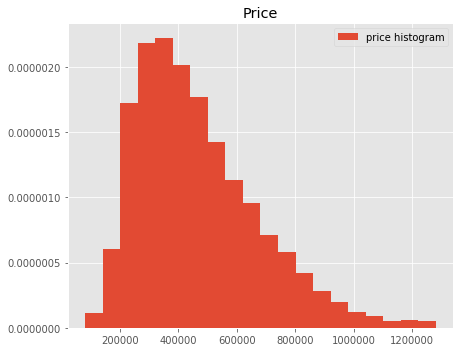

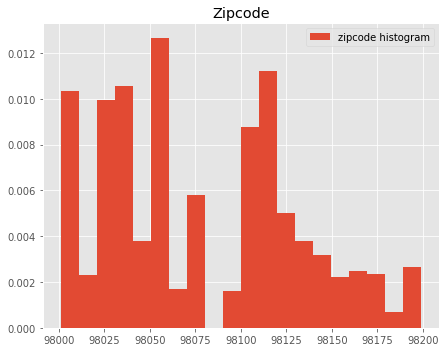

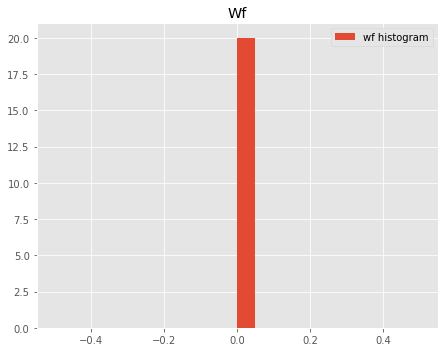

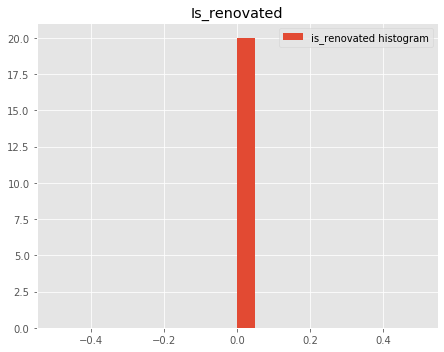

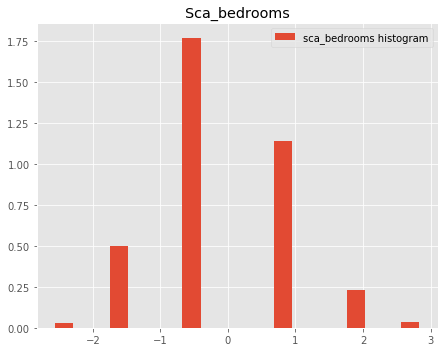

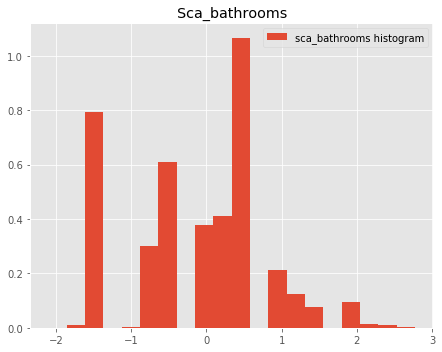

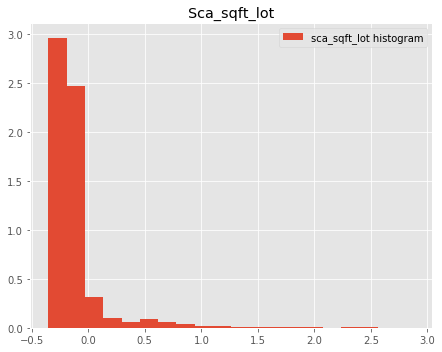

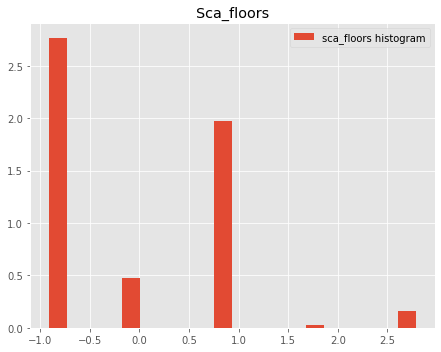

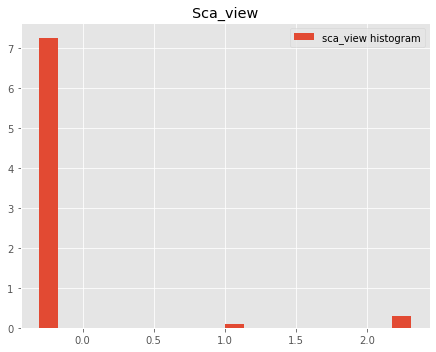

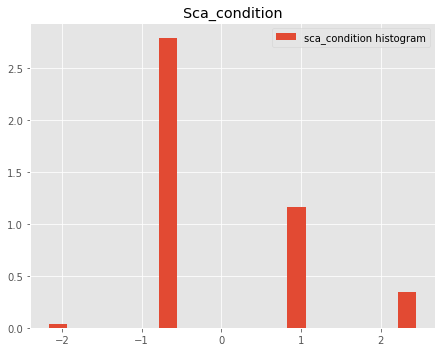

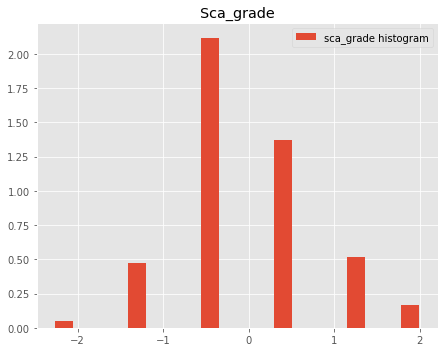

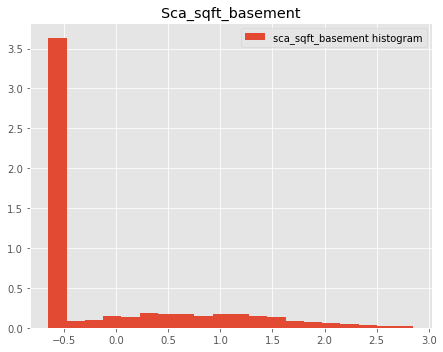

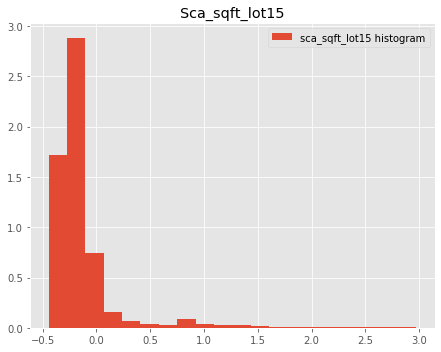

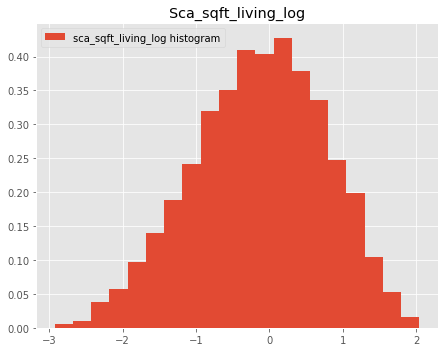

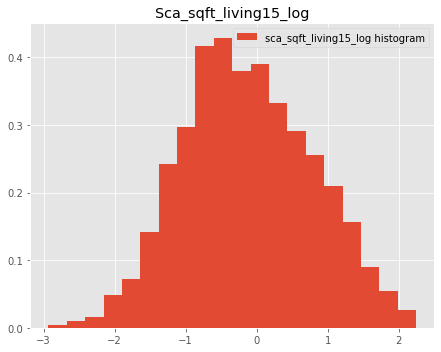

In [80]:
histograms(df_clean)

## Correlation Post Transformation

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a23e06f60>)

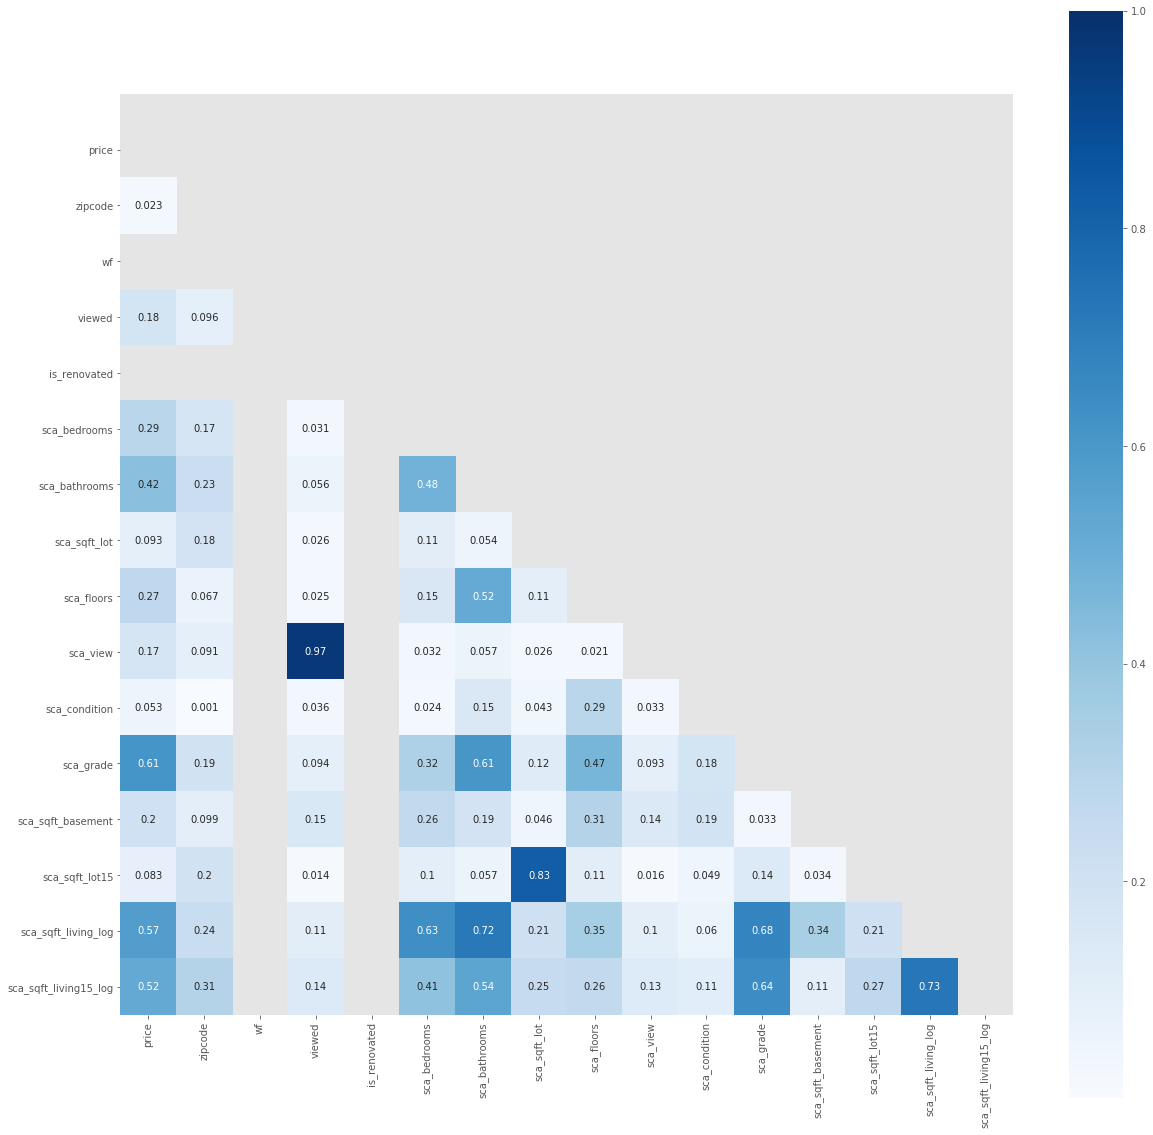

In [81]:
corr = df_clean.corr()

def corrplot(corr,figsize=(20,20)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,cmap="Blues",annot=True,ax=ax)
    ax.set_ylim(len(corr), -.5, .5)
    return fig, ax

corrplot(corr.round(3))

In [82]:
df_clean.isna().sum()

price                    0
zipcode                  0
wf                       0
viewed                   0
yr_category              0
is_renovated             0
sca_bedrooms             0
sca_bathrooms            0
sca_sqft_lot             0
sca_floors               0
sca_view                 0
sca_condition            0
sca_grade                0
sca_sqft_basement        0
sca_sqft_lot15           0
sca_sqft_living_log      0
sca_sqft_living15_log    0
dtype: int64

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18655 entries, 0 to 21596
Data columns (total 17 columns):
price                    18655 non-null float64
zipcode                  18655 non-null int64
wf                       18655 non-null float64
viewed                   18655 non-null bool
yr_category              18655 non-null category
is_renovated             18655 non-null int64
sca_bedrooms             18655 non-null float64
sca_bathrooms            18655 non-null float64
sca_sqft_lot             18655 non-null float64
sca_floors               18655 non-null float64
sca_view                 18655 non-null float64
sca_condition            18655 non-null float64
sca_grade                18655 non-null float64
sca_sqft_basement        18655 non-null float64
sca_sqft_lot15           18655 non-null float64
sca_sqft_living_log      18655 non-null float64
sca_sqft_living15_log    18655 non-null float64
dtypes: bool(1), category(1), float64(13), int64(2)
memory usage: 2.3 MB


# MODEL

In [84]:
pred1 = ['C(zipcode)', 'wf', 'is_renovated','sca_bedrooms',
         'sca_bathrooms', 'sca_sqft_lot', 'sca_floors', 'C(viewed)',
         'sca_condition', 'sca_grade', 'sca_sqft_basement', 'sca_sqft_lot15', 
         'sca_sqft_living_log', 'sca_sqft_living15_log']

In [85]:
f1 = '+'.join(pred1)
f1

'C(zipcode)+wf+is_renovated+sca_bedrooms+sca_bathrooms+sca_sqft_lot+sca_floors+C(viewed)+sca_condition+sca_grade+sca_sqft_basement+sca_sqft_lot15+sca_sqft_living_log+sca_sqft_living15_log'

In [86]:
import statsmodels.formula.api as smf
f ='price~'+f1
model = smf.ols(formula=f, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1044.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:39:23   Log-Likelihood:            -2.3898e+05
No. Observations:               18655   AIC:                         4.781e+05
Df Residuals:                   18574   BIC:                         4.787e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3.071e+05   4790.120     64.108      0.000    2.98e+05    3.16e+05
C(zipcode)[T.98002]    2.048e+04   8035.653      2.549      0.011    4728.722    3.62e+04
C(zipcode)[T.98003]   -2650.5864   7244.747     -0.366      0.714   -1.69e+04    1.15e+04
C(zipcode)[T.98004]    5.347e+05   8493.887     62.946      0.000    5.18e+05    5.51e+05
C(zipcode)[T.98005]     3.42e+05   9011.620     37.949      0.000    3.24e+05     3.6e+05
C(zipcode)[T.98006]     2.81e+05   6840.137     41.088      0.000    2.68e+05    2.94e+05
C(zipcode)[T.98007]    2.614e+05   9114.786     28.673      0.000    2.43e+05    2.79e+05
C(zipcode)[T.98008]    2.365e+05   7388.787     32.002      0.000    2.22e+05    2.51e+05
C(zipcode)[T.98010]    9.283e+04   1.17e+04      7.949      0.000    6.99e+04    1.16e+05
C(zipcode)[T.98011]     1.49e+05   8148.824     18.279      0.000    1.33e+05    1.65e+05
C(zipcode)[T.98014]    1.161e+05   1.11e+04     10.480      0.000    9.44e+04    1.38e+05
C(zipcode)[T.98019]    9.492e+04   8488.153     11.183      0.000    7.83e+04    1.12e+05
C(zipcode)[T.98022]    2071.1733   8585.993      0.241      0.809   -1.48e+04    1.89e+04
C(zipcode)[T.98023]   -1.645e+04   6285.282     -2.618      0.009   -2.88e+04   -4132.106
C(zipcode)[T.98024]    1.518e+05   1.43e+04     10.614      0.000    1.24e+05     1.8e+05
C(zipcode)[T.98027]    2.036e+05   6848.515     29.723      0.000     1.9e+05    2.17e+05
C(zipcode)[T.98028]    1.361e+05   7224.396     18.841      0.000    1.22e+05     1.5e+05
C(zipcode)[T.98029]     2.29e+05   7034.671     32.549      0.000    2.15e+05    2.43e+05
C(zipcode)[T.98030]    2515.8696   7369.955      0.341      0.733   -1.19e+04     1.7e+04
C(zipcode)[T.98031]    6600.4871   7234.928      0.912      0.362   -7580.636    2.08e+04
C(zipcode)[T.98032]    4896.2559   9421.741      0.520      0.603   -1.36e+04    2.34e+04
C(zipcode)[T.98033]    3.353e+05   6739.767     49.754      0.000    3.22e+05    3.49e+05
C(zipcode)[T.98034]    1.886e+05   6200.227     30.416      0.000    1.76e+05    2.01e+05
C(zipcode)[T.98038]    3.322e+04   6156.302      5.396      0.000    2.12e+04    4.53e+04
C(zipcode)[T.98039]     6.73e+05   3.18e+04     21.184      0.000    6.11e+05    7.35e+05
C(zipcode)[T.98040]    4.511e+05   8627.475     52.285      0.000    4.34e+05    4.68e+05
C(zipcode)[T.98042]    4170.7247   6175.481      0.675      0.499   -7933.785    1.63e+04
C(zipcode)[T.98045]    1.071e+05   8138.186     13.161      0.000    9.12e+04    1.23e+05
C(zipcode)[T.98052]    2.599e+05   6167.518     42.140      0.000    2.48e+05    2.72e+05
C(zipcode)[T.98053]    2.429e+05   6896.170     35.225      0.000    2.29e+05    2.56e+05
C(zipcode)[T.98055]    4.904e+04   7345.893      6.676      0.000    3.46e+04    6.34e+04
C(zipcode)[T.98056]    

Model Interpretation
Looks very good except 0.169 P-value for 'sca_bedrooms'. Indicates that changes in the predictor are not associated with changes in the response. Will retry model without 'sca_bedrooms'.

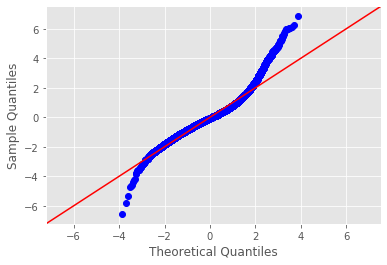

In [88]:

import statsmodels.api as sm
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [89]:
pred2 = ['C(zipcode)', 'wf',
         'sca_bathrooms', 'sca_sqft_lot', 'sca_floors', 'C(viewed)',
        'sca_condition', 'sca_grade', 'sca_sqft_basement', 'sca_sqft_lot15', 
         'sca_sqft_living_log', 'sca_sqft_living15_log']

In [90]:
f2 = '+'.join(pred2)
f2

'C(zipcode)+wf+sca_bathrooms+sca_sqft_lot+sca_floors+C(viewed)+sca_condition+sca_grade+sca_sqft_basement+sca_sqft_lot15+sca_sqft_living_log+sca_sqft_living15_log'

In [91]:
f ='price~'+f2
model = smf.ols(formula=f, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1057.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:39:36   Log-Likelihood:            -2.3898e+05
No. Observations:               18655   AIC:                         4.781e+05
Df Residuals:                   18575   BIC:                         4.787e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               3.07e+05   4789.776     64.094      0.000    2.98e+05    3.16e+05
C(zipcode)[T.98002]    2.045e+04   8035.818      2.545      0.011    4698.971    3.62e+04
C(zipcode)[T.98003]   -2600.5814   7244.829     -0.359      0.720   -1.68e+04    1.16e+04
C(zipcode)[T.98004]    5.346e+05   8494.078     62.942      0.000    5.18e+05    5.51e+05
C(zipcode)[T.98005]    3.419e+05   9011.448     37.937      0.000    3.24e+05     3.6e+05
C(zipcode)[T.98006]     2.81e+05   6840.206     41.080      0.000    2.68e+05    2.94e+05
C(zipcode)[T.98007]     2.61e+05   9110.741     28.644      0.000    2.43e+05    2.79e+05
C(zipcode)[T.98008]    2.361e+05   7384.745     31.973      0.000    2.22e+05    2.51e+05
C(zipcode)[T.98010]    9.306e+04   1.17e+04      7.970      0.000    7.02e+04    1.16e+05
C(zipcode)[T.98011]     1.49e+05   8148.878     18.287      0.000    1.33e+05    1.65e+05
C(zipcode)[T.98014]    1.166e+05   1.11e+04     10.528      0.000    9.49e+04    1.38e+05
C(zipcode)[T.98019]    9.517e+04   8486.392     11.215      0.000    7.85e+04    1.12e+05
C(zipcode)[T.98022]    2221.7311   8585.501      0.259      0.796   -1.46e+04    1.91e+04
C(zipcode)[T.98023]   -1.648e+04   6285.409     -2.621      0.009   -2.88e+04   -4155.997
C(zipcode)[T.98024]    1.519e+05   1.43e+04     10.619      0.000    1.24e+05     1.8e+05
C(zipcode)[T.98027]    2.037e+05   6847.688     29.750      0.000     1.9e+05    2.17e+05
C(zipcode)[T.98028]    1.362e+05   7224.429     18.850      0.000    1.22e+05     1.5e+05
C(zipcode)[T.98029]    2.292e+05   7033.320     32.584      0.000    2.15e+05    2.43e+05
C(zipcode)[T.98030]    2511.9496   7370.131      0.341      0.733   -1.19e+04     1.7e+04
C(zipcode)[T.98031]    6560.9382   7235.045      0.907      0.365   -7620.413    2.07e+04
C(zipcode)[T.98032]    4658.3215   9420.378      0.494      0.621   -1.38e+04    2.31e+04
C(zipcode)[T.98033]    3.354e+05   6739.825     49.761      0.000    3.22e+05    3.49e+05
C(zipcode)[T.98034]    1.885e+05   6200.054     30.403      0.000    1.76e+05    2.01e+05
C(zipcode)[T.98038]    3.338e+04   6155.317      5.423      0.000    2.13e+04    4.54e+04
C(zipcode)[T.98039]    6.729e+05   3.18e+04     21.183      0.000    6.11e+05    7.35e+05
C(zipcode)[T.98040]     4.51e+05   8627.175     52.272      0.000    4.34e+05    4.68e+05
C(zipcode)[T.98042]    4210.4220   6175.562      0.682      0.495   -7894.246    1.63e+04
C(zipcode)[T.98045]    1.072e+05   8137.848     13.177      0.000    9.13e+04    1.23e+05
C(zipcode)[T.98052]    2.599e+05   6167.627     42.144      0.000    2.48e+05    2.72e+05
C(zipcode)[T.98053]    2.437e+05   6874.170     35.448      0.000     2.3e+05    2.57e+05
C(zipcode)[T.98055]    4.918e+04   7345.363      6.696      0.000    3.48e+04    6.36e+04
C(zipcode)[T.98056]    

## Test-Split

In [92]:
df_clean.columns


Index(['price', 'zipcode', 'wf', 'viewed', 'yr_category', 'is_renovated',
       'sca_bedrooms', 'sca_bathrooms', 'sca_sqft_lot', 'sca_floors',
       'sca_view', 'sca_condition', 'sca_grade', 'sca_sqft_basement',
       'sca_sqft_lot15', 'sca_sqft_living_log', 'sca_sqft_living15_log'],
      dtype='object')

In [93]:

y = df_clean[['price']]
X = df_clean[[ 'zipcode','wf', 'sca_bathrooms', 'sca_sqft_lot', 'sca_floors', 'viewed', 'sca_condition',
             'sca_grade', 'sca_sqft_basement', 'sca_sqft_lot15', 'sca_sqft_living_log', 'sca_sqft_living15_log']]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14924 3731 14924 3731


In [99]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [102]:
r_squared = linreg.score(X_train, y_train)
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('R Squared:', r_squared)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

R Squared: 0.4826076578126131
Train Mean Squarred Error: price    2.215490e+10
dtype: float64
Test Mean Squarred Error: price    2.205471e+10
dtype: float64
Train Root Mean Squarred Error: price    148845.220082
dtype: float64
Test Root Mean Squarred Error: price    148508.288357
dtype: float64


# INTERPRET & RECOMMENDATIONS

Using the final model can predict house values with approximately 80% confidence of variability of the response data around its mean.

The most important variables when trying to improve the value of a home are: zipcode, square feet of living space, grade, and square feet of lot.

For future work, it would be interesting to see how school district influences prices of homes. Other future projects might include looking at how home values fluctuate over a period of several years and how the economy has an influence on when and how much people are willing to pay for a home.